In [1]:
import xarray as xr
import glob
import matplotlib.pyplot as plt

In [2]:
def pro_data(da):
    dat = da.drop_vars('lon').drop_vars('lat')
    dat = dat.rename({'rlon':'lon'}).rename({'rlat':'lat'})
    return(dat)

def check_leap(data):
    return(data.time.dt.calendar)

In [3]:
files = glob.glob('../../stevecordex/*.nc')

# HadGEM2_REMO = xr.open_dataset('../../stevecordex/pr_GHA-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-20051230.nc')
# MPI_REMO = xr.open_dataset('../../stevecordex/pr_GHA-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-20051231.nc')
# NOR_REMO = xr.open_dataset('../../stevecordex/pr_GHA-22_NCC-NorESM1-M_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-20051231.nc')
Chirps = xr.open_dataset('../data2/Ghana_chirps.nc')
Chirps =  Chirps.rename({'longitude':'lon'}).rename({'latitude':'lat'}).rename({'precip':'pr'})


In [4]:
HadGEM2_REMO_Tx = xr.open_dataset('../../stevecordex/tasmax_GHA-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-20051230.nc')
ERA_Tx = xr.open_dataset('Ghana_ERA5_dTx_1981_2020.nc')
ERA_Tx = ERA_Tx.rename({'longitude':'lon'}).rename({'latitude':'lat'}).rename({'mx2t':'tasmax'})+273.15
ERA_Tn = xr.open_dataset('Ghana_ERA5_dTn_1981_2020.nc')
ERA_Tn = ERA_Tn.rename({'longitude':'lon'}).rename({'latitude':'lat'}).rename({'mn2t':'tasmax'})+273.15

loading MPI-M- combined with REMO
loaded data has leap years
loading NCC-No combined with REMO
loaded data has leap years


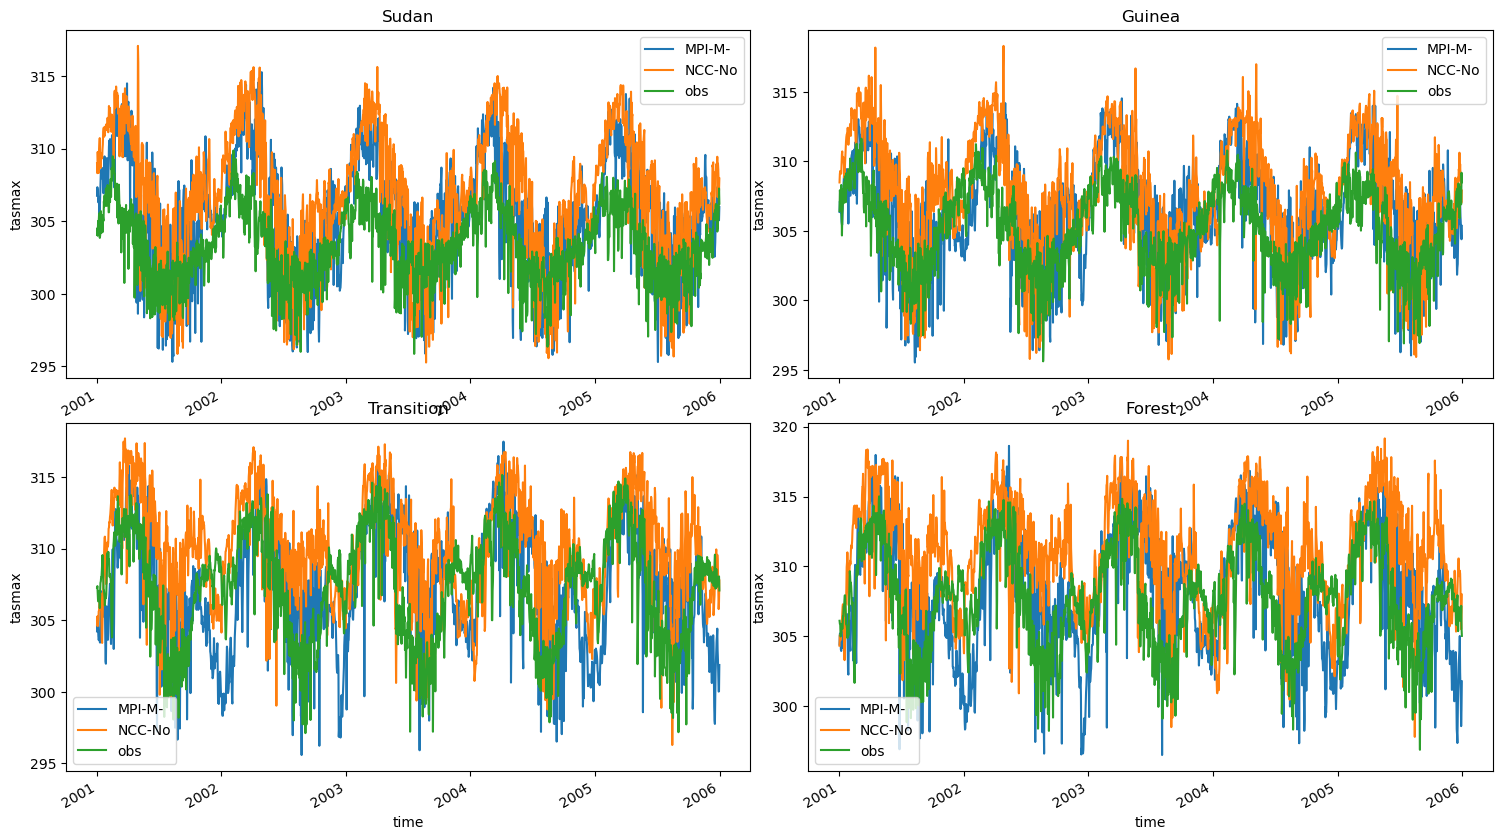

In [8]:
fig, ax = plt.subplots(2,2, figsize=(15,8), squeeze = False)
ax = ax.flatten()
plt.tight_layout()
period = ['2001', '2005']
titles = ['Sudan','Guinea','Transition','Forest','Coast']
          
for i, data in enumerate(files):
    
    # if data[18]=='p':
    #     var = 'pr'
    #     ds = xr.open_dataset(data)[var]*86400
    #     c = check_leap(ds)
    #     if c == 'proleptic_gregorian':
    #         print('loading ' + data[32:38] + ' combined with ' + data[-36:-32])
    #         print('loaded data has leap years')
    #         p_data = pro_data(ds)
    #         p_data.sel(lon ='-1', lat='6',method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38],ax=ax[0])
    #         p_data.sel(lon ='-1', lat='7', method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38], ax=ax[1])
    #         p_data.sel(lon ='-1', lat='11', method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38], ax=ax[2])
    #         p_data.sel(lon ='-1', lat='12', method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38], ax=ax[3])

            
        
#             # ax1.set_label(data[32:38])

#             # p_data.plot(ax=ax[0])

#             #             # north = p_data.sel(lon ='-1', lat='11', method='nearest')[var].sel(time=slice('2001','2005'))
# #             # transition = p_data.sel(lon ='-1', lat='7', method='nearest')[var].sel(time=slice('2001','2005'))


# #         else:
# #             print('loaded data has no leap years')
    if data[18:24]=='tasmax':
            var = 'tasmax'
            ds = xr.open_dataset(data)[var]
            c = check_leap(ds)
            if c == 'proleptic_gregorian':
                print('loading ' + data[32:38] + ' combined with ' + data[-36:-32])
                print('loaded data has leap years')
                p_data = pro_data(ds)
                p_data.sel(lon ='-1', lat='6',method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38],ax=ax[0])
                p_data.sel(lon ='-1', lat='7', method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38], ax=ax[1])
                p_data.sel(lon ='-1', lat='11', method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38], ax=ax[2])
                p_data.sel(lon ='-1', lat='12', method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38], ax=ax[3])
                
                
#     if data[18:24]=='tasmin':
#             var = 'tasmin'
#             ds = xr.open_dataset(data)[var]
#             c = check_leap(ds)
#             if c == 'proleptic_gregorian':
#                 print('loading ' + data[32:38] + ' combined with ' + data[-36:-32])
#                 print('loaded data has leap years')
#                 p_data = pro_data(ds)
#                 p_data.sel(lon ='-1', lat='6',method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38],ax=ax[0])
#                 p_data.sel(lon ='-1', lat='7', method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38], ax=ax[1])
#                 p_data.sel(lon ='-1', lat='11', method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38], ax=ax[2])
#                 p_data.sel(lon ='-1', lat='12', method='nearest').sel(time=slice(period[0],period[1])).plot(label=data[32:38], ax=ax[3])
            

#         else:
#             print('loaded temperature data has no leap years')
    # else:
        # print(data[32:38] + ' combined with ' + data[-36:-32] + ' has 360 day calendar')

        # ds = xr.open_dataset(data)

# if var == 'pr':
#     Chirps.sel(lon ='-1', lat='6', method='nearest')[var].sel(time=slice('2001','2005')).plot(label='obs',ax=ax[0])           
#     Chirps.sel(lon ='-1', lat='7', method='nearest')[var].sel(time=slice('2001','2005')).plot(label='obs',ax=ax[1]) 
#     Chirps.sel(lon ='-1', lat='11', method='nearest')[var].sel(time=slice('2001','2005')).plot(label='obs',ax=ax[2]) 
#     Chirps.sel(lon ='-1', lat='12', method='nearest')[var].sel(time=slice('2001','2005')).plot(label='obs',ax=ax[3])           

if var == 'tasmax':
    ERA_Tx.sel(lon ='-1', lat='6', method='nearest')[var].sel(time=slice(period[0],period[1])).plot(label='obs',ax=ax[0])           
    ERA_Tx.sel(lon ='-1', lat='7', method='nearest')[var].sel(time=slice(period[0],period[1])).plot(label='obs',ax=ax[1]) 
    ERA_Tx.sel(lon ='-1', lat='11', method='nearest')[var].sel(time=slice(period[0],period[1])).plot(label='obs',ax=ax[2]) 
    ERA_Tx.sel(lon ='-1', lat='12', method='nearest')[var].sel(time=slice(period[0],period[1])).plot(label='obs',ax=ax[3])           

# if  var == 'tasmin':
#     ERA_Tn.sel(lon ='-1', lat='6', method='nearest')[var].sel(time=slice(period[0],period[1])).plot(label='obs',ax=ax[0])           
#     ERA_Tn.sel(lon ='-1', lat='7', method='nearest')[var].sel(time=slice(period[0],period[1])).plot(label='obs',ax=ax[1]) 
#     ERA_Tn.sel(lon ='-1', lat='11', method='nearest')[var].sel(time=slice(period[0],period[1])).plot(label='obs',ax=ax[2]) 
#     ERA_Tn.sel(lon ='-1', lat='12', method='nearest')[var].sel(time=slice(period[0],period[1])).plot(label='obs',ax=ax[3])           



titles = ['Sudan','Guinea','Transition','Forest']
for i,j in enumerate(ax):
    # ax[i].title.set_text(titles[i])
    ax[i].set_title(titles[i])
    ax[i].set_title(titles[i])
    ax[i].legend()

# ax[1].legend(['obs'])

# ax.legend()
fig.savefig('../Untitled Folder/' +var+'.jpeg')

In [ ]:
data[18:24]